<a href="https://colab.research.google.com/github/evmpython/CAT010_UNIFEI_2024/blob/main/CAT010_Aula_07_Queimadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---

## **Aula Prática 7:** $\underline{Analisando\ Dados\ de\ Queimadas}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como **acessar**, **analisar** e **plotar figuras** dos dados de focos de calor estimado por satélites.

---


**DADOS DE ENTRADA**: Serão utilizados dados de queimadas do portal **BDQUEIMADAS** do CPTEC/INPE. Existem dois tipos de dados de queimadas que podem ser utilizados:

1. [Dados em tempo real em mapas](http://terrabrasilis.dpi.inpe.br/queimadas/bdqueimadas/)

2. [Dados históricos](https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/). São dados nas escalas temporais:
    1. **10min**: dados dos últimos 4 dias
    2. **anual**: dados desde 2003
    3. **diário**: dados do mês atual
    4. **mensal**: dados do ano anterior e atual



---


**DADOS DE SAÍDA:**
- **Tipo do dado:** Figuras
- **Formato do dado:** JPG
- **Imagens geradas:**
    1. Mapas Interativos
    2. Fig_1_mapa.jpg
    3. Fig_2_serie_temporal_diaria.jpg
    4. Fig_3_serie_temporal_porano.jpg
    5. Fig_4_calendar_plot.jpg

---


**METODOLOGIA:** Serão abordados os seguintes tópicos:

1.   Mapas Interativos com Leafmap
2.   Mapa de Densidade de Focos de Calor
3.   Séries Temporais


---


**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Mapas Interativos
6.   Mapa de Densidade
7.   Séries Temporais

---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 23/08/2022
- **Atualizado por:** Enrique V. Mattos - 27/11/2024


---

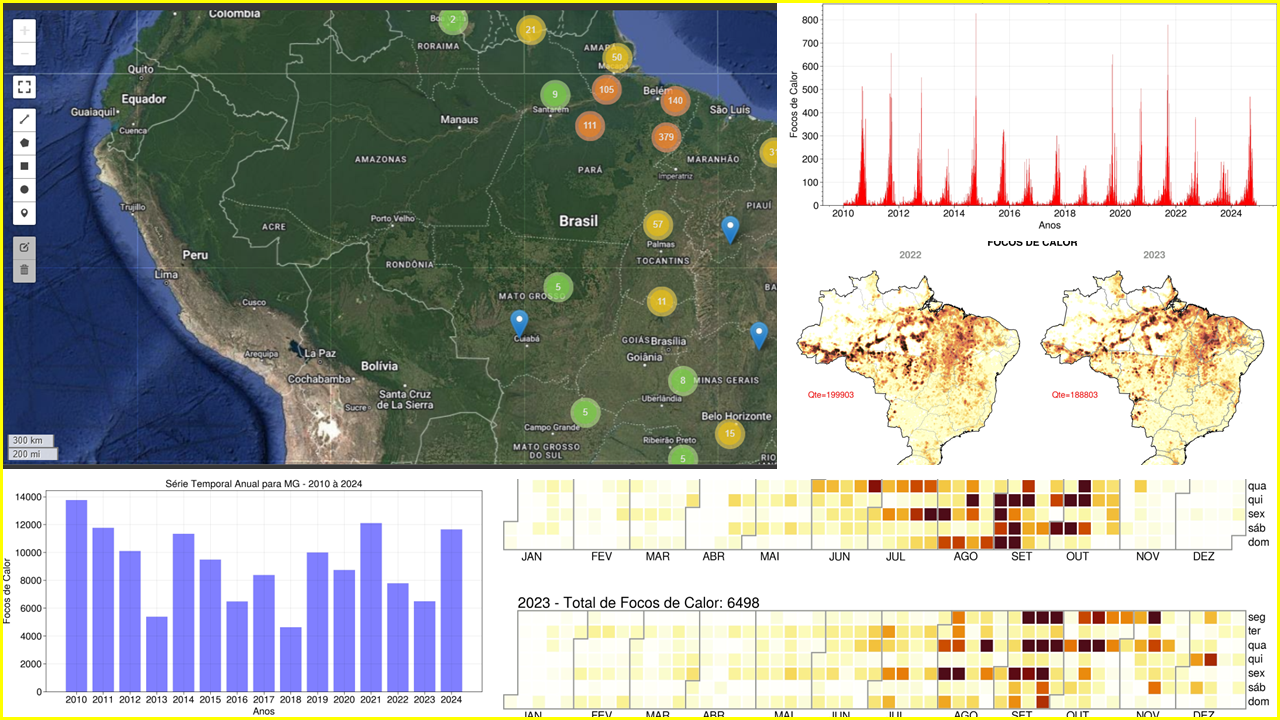

# **1° Passo:** Instalando as bibliotecas

In [ ]:
# instalando o proplot
!pip install -q proplot

# instalando o cartopy
!pip uninstall -q shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual da nossa aula prática.

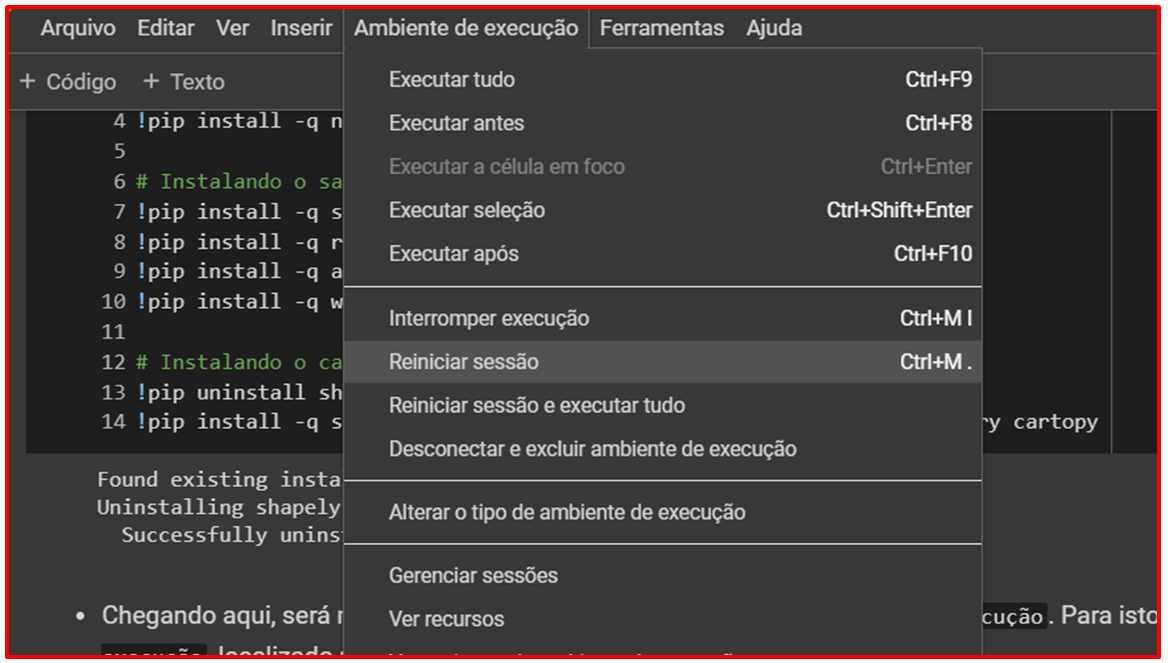

In [ ]:
# instalando o calplot, leafmap e salem
!pip install -q calplot leafmap rasterio pyproj geopandas salem descartes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.3/504.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━

# **2° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/'

- Criando a pasta de saída ("output")

In [ ]:
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **4° Passo:** Importando as bibliotecas

In [ ]:
import glob                     # glob: lista arquivos do diretório
import numpy as np              # NumPy: trabalha com arrays
import pandas as pd             # Pandas: trabalha com tabelas
import matplotlib.pyplot as plt # Matplotlib: o fundamento de toda a criação de gráficos em Python.
import proplot as pplt          # Proplot: pacote de visualização de gráficos e mapas com dados meteorológicos em alto nível.
import pytz                     # Pytz: transforma hora UTC para hora local
import seaborn as sns           # Seaborn: trabalha com gráficos estatísticos
import time                     # Time: contabiliza o tempo de uma operação
import calplot
import cartopy.io.shapereader as shpreader
import cartopy, cartopy.crs as ccrs
import xarray as xr
import salem

# vamos ignorar avisos
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


# **PARTE 1):** Mapas Interativos

O [`leafmap`](https://leafmap.org/) é um pacote para mapeamento interativo de dados espacial em Python. Foi criado em 2021 e é extremamente versátil e amigável. Foi desenvolvido por Qiusheng Wu como um derivado do pacote `geemap`, usado exclusivamente no contexto do **Google Earth Engine**. O `leafmap` oferece uma sintaxe simples que permite a criação de mapas interativos de forma eficiente através da integração com outros pacotes como `Folium` e `ipyleaflet`.

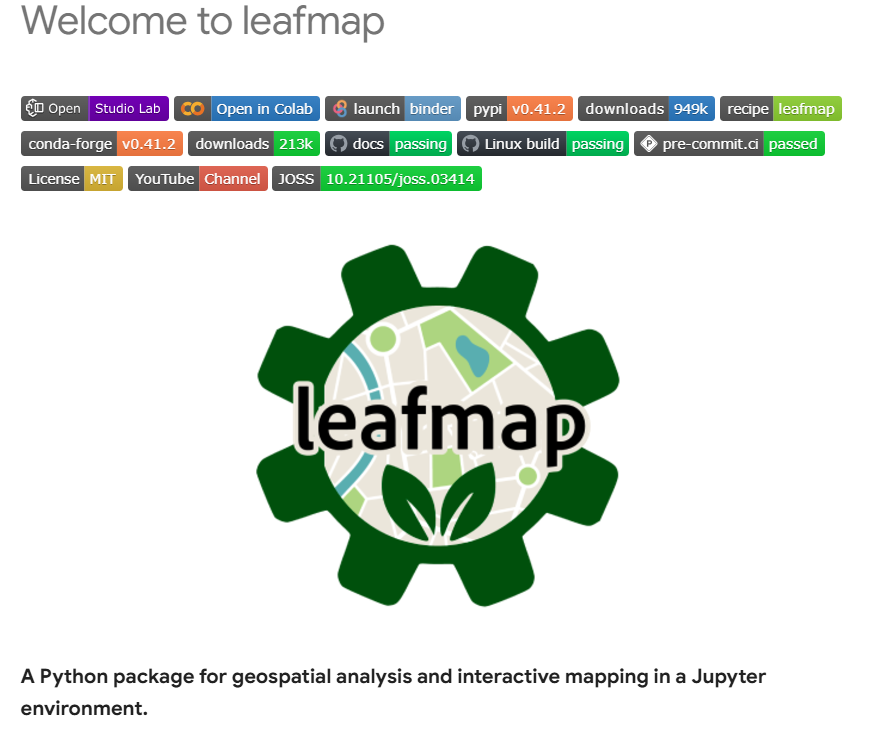

 Antes de mais nada, vamos importá-lo:

In [ ]:
import leafmap

Para começar, vamos criar o nosso primeiro mapa interativo com `leafmap` para entender um pouco da sua sintaxe:

 - A primeira linha de código define o mapa interativo com `leafmap.Map()`, sendo que o argumento `center` define o centro do mapa especificado como um par de coordenadas em latitude e longitude. Depois, como o nome já indica, o argumento `zoom` controla o nível de zoom inicial do mapa. Em seguida, `Map.add_basemap()` adiciona um mapa de base padrão à visualização que depende da extensa lista disponível no `leafmap`.

 - Por fim, `Map` exibe o mapa interativo com as configurações e camadas definidas anteriormente de forma que é possível navegar, dar zoom e explorar os dados.

In [ ]:
# define o mapa
m = leafmap.Map(center=(0, -60), zoom=4)

# adiciona mapa de fundo
m.add_basemap('SATELLITE')

# mostra o mapa
m

Mas, por mais que o mapa seja interativo, um mapa vazio ainda não tem muita graça. Então vamos carregar os dados de queimadas do INPE dos [arquivos](https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/10min/) disponibilizados a cada 10min.

In [ ]:
# link dos dados do INPE
url_10min = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/10min/focos_10min_20241126_1920.csv'

In [ ]:
# leitura dos dados
focos = pd.read_csv(url_10min)

In [ ]:
# mostra os dados
focos.head()

,lat,lon,satelite,data
0,5.73861,-55.67255,AQUA_M-T,2024-11-26 17:43:00
1,5.31979,-55.47556,AQUA_M-T,2024-11-26 17:41:00
2,5.31760,-55.48366,AQUA_M-T,2024-11-26 17:41:00
3,5.31745,-55.49031,AQUA_M-T,2024-11-26 17:41:00
4,4.49227,-52.34726,AQUA_M-T,2024-11-26 17:41:00


In [ ]:
# quantidade de focos daquele horário
focos.shape[0]

959

In [ ]:
# nomes dos satélites
focos['satelite'].unique()

array(['AQUA_M-T'], dtype=object)

Vamos plotar o mapa com os dados de focos de calor do INPE.

In [ ]:
# define o mapa
m = leafmap.Map(center=(-15, -60), zoom=4)

# adiciona mapa de fundo
m.add_basemap('HYBRID')

# plota os dados
m.add_xy_data(focos, x="lon", y="lat")

# exibe o mapa
m

Vamos adicionar mais elementos a ele, começando pelos contornos do Brasil a nível municipal graças ao repositório [geodata-br](https://github.com/tbrugz/geodata-br) no Github.

In [ ]:
brasil = 'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-100-mun.json'

No entanto, estamos diante de uma certa problemática: como destacar especificamente os focos de calor que foram identificados sobre o Brasil? Uma solução passa pelo arquivo `.json` definido em `brasil`, que contém informações geográficas dos municípios brasileiros. Através dessa abordagem, vamos *mascarar* os dados, restringindo a exibição dos focos de calor exclusivamente à área do Brasil.

Para isso, vamos antes importar um pacote chamado `GeoPandas`:

In [ ]:
# importar geopandas
import geopandas as gpd

O `GeoPandas` é pacote que oferece suporte à manipulação e análise de dados geoespaciais, combinando funcionalidades do `Pandas`. Ele pode ser usado para simplificar tarefas como a leitura de formatos de arquivos geoespaciais e a realização de operações espaciais.

A nossa primeira tarefa de fato com o `GeoPandas` será fazer a leitura de fato do arquivo em `brasil` com `gpd.read_file()`

In [ ]:
# leitura do arquivo cok o contornos dos munícipios brasileiros
brasil_gpd = gpd.read_file(brasil)

O `GeoPandas` tem suporte a uma série de formato de arquivos geoespaciais, como shapefile (`.shp`), GeoJSON (`.geojson`) e outros. E assim como o `Pandas` tem uma estrutura de dados chamada `DataFrame`, o `GeoPandas` tem o `GeoDataFrame`:

In [ ]:
type(brasil_gpd)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# mostrando o GeoDataframe
brasil_gpd

,id,name,description,geometry
0,1100015,Alta Floresta D'Oeste,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.1623 -11.87..."
1,1100023,Ariquemes,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754..."
2,1100031,Cabixi,Cabixi,"POLYGON ((-60.3994 -13.45584, -60.40195 -13.46..."
3,1100049,Cacoal,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4..."
4,1100056,Cerejeiras,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0..."
...,...,...,...,...
5559,5222005,Vianópolis,Vianópolis,"POLYGON ((-48.43125 -16.62755, -48.42527 -16.6..."
5560,5222054,Vicentinópolis,Vicentinópolis,"POLYGON ((-49.85005 -17.57682, -49.84311 -17.5..."
5561,5222203,Vila Boa,Vila Boa,"POLYGON ((-47.11019 -14.6715, -47.11607 -14.67..."
5562,5222302,Vila Propício,Vila Propício,"POLYGON ((-48.75124 -14.90461, -48.75196 -14.9..."


Agora que temos um `DataFrame` (variável **focos**) e um `GeoDataFrame`(variável **brasil_gpd**), vamos combinar os dois criando uma nova variável:

In [ ]:
# novo geodataframe
focos_gpd = gpd.GeoDataFrame(focos.reset_index(),
                             geometry=gpd.points_from_xy(focos.lon, focos.lat))

In [ ]:
# atribuição do sistema de coordenadas de referência (CRS)
focos_gpd.crs = brasil_gpd.crs

Como resultante, temos o seguinte novo `GeoDataFrame`:

In [ ]:
focos_gpd.head()

,index,lat,lon,satelite,data,geometry
0,0,5.73861,-55.67255,AQUA_M-T,2024-11-26 17:43:00,POINT (-55.67255 5.73861)
1,1,5.31979,-55.47556,AQUA_M-T,2024-11-26 17:41:00,POINT (-55.47556 5.31979)
2,2,5.31760,-55.48366,AQUA_M-T,2024-11-26 17:41:00,POINT (-55.48366 5.3176)
3,3,5.31745,-55.49031,AQUA_M-T,2024-11-26 17:41:00,POINT (-55.49031 5.31745)
4,4,4.49227,-52.34726,AQUA_M-T,2024-11-26 17:41:00,POINT (-52.34726 4.49227)


A *máscara* ainda não está feita, já que ainda temos todos os dados de focos de queimadas da América do Sul. Essa operação será feita com a função `.overlay()`, através da interseção entre `focos_gpd` e `brasil_gpd`. Isto é:

In [ ]:
focos_brasil = gpd.overlay(focos_gpd, brasil_gpd, how='intersection')

Para finalizar, vamos ter que fazer a conversão de tempo e atribuição de um `index` para a tabela com `Pandas`:

In [ ]:
focos_brasil['data'] = pd.to_datetime(focos_brasil['data'])
focos_brasil.set_index('data', inplace=True)

Como resultante, temos que:

In [ ]:
focos_brasil.head()

,index,lat,lon,satelite,id,name,description,geometry
data,,,,,,,,
2024-11-26 17:38:00,13,-3.84303,-42.01878,AQUA_M-T,2203701,Esperantina,Esperantina,POINT (-42.01878 -3.84303)
2024-11-26 17:38:00,14,-3.53010,-42.99862,AQUA_M-T,2100808,Anapurus,Anapurus,POINT (-42.99862 -3.5301)
2024-11-26 17:38:00,15,-5.43228,-40.79214,AQUA_M-T,2304103,Crateús,Crateús,POINT (-40.79214 -5.43228)
2024-11-26 17:38:00,16,-5.36946,-39.84617,AQUA_M-T,2310506,Pedra Branca,Pedra Branca,POINT (-39.84617 -5.36946)
2024-11-26 17:38:00,17,-9.98965,-44.27624,AQUA_M-T,2203206,Curimatá,Curimatá,POINT (-44.27624 -9.98965)


E agora, vamos criar mais um mapa interativo e visualizar o resultado final:

In [ ]:
# define o mapa
m = leafmap.Map(center=(-15, -60), zoom=4)

# adiciona mapa de fundo
m.add_basemap('HYBRID')

# plota os dados
m.add_xy_data(focos_brasil, x="lon", y="lat")

# exibe o mapa
m

In [ ]:
# salva imagem para HTML
m.to_html("mapainterativo_focos.html")

A variável `brasil` acima está recebendo uma url que leva a um arquivo JSON hospedado no GitHub. Usando esse link, vamos adicionar o conteúdo geográfico ao mapa interativo usando `.add_geojson()`.

In [ ]:
# define o mapa
m = leafmap.Map(center=(-15, -60), zoom=4)

# adiciona mapa de fundo
m.add_basemap('HYBRID')

# plota os dados
m.add_xy_data(focos_brasil, x="lon", y="lat")

# adiciona contorno dos municípios do Brasil
m.add_geojson(brasil, layer_name="Munícipios do Brasil")

# exibe o mapa
m

A criação de um mapa interativo com `leafmap` oferece uma ferramenta de uso simples para a visualização dos focos de calor sobre a América do Sul nas últimas horas e dias, o que nos permite identificar visualmente a distribuição geográfica desses focos e facilitando uma análise mais contextualizada das áreas afetadas.



---


Escolha uma data diferente da escolhida na aula, e avalie a distribuição espacial dos focos de calor.


---



# **PARTE 2):** Mapa de Densidade

## Função

In [ ]:
# Função que calcula o índice i e j da localização do foco de calor
def index(longitudes_matriz, latitudes_matriz, lon_foco, lat_foco):

    ''' Função para calcular o índice (i e j) do pixel de uma matriz que o relâmpago pertence

    Parâmetros:
               longitudes_matriz (array): array de uma dimensão das longitudes da matriz em graus
               latitudes_matriz (array): array de uma dimensão das latitudes da matriz em graus
               lon_raio (float): valor da longitude do foco em graus
               lat_raio (float): valor da latitude do foco em graus

    Retorna:
            indice_lat_raio (float): índice da latitude (ou seja, da linha) do pixel da matriz que o foco pertence
            indice_lon_raio (float): índice da longitude (ou seja, da coluna) do pixel da matriz que o foco pertence
    '''

    # calcula a diferença entre as lats/lons da matriz e a latitude/longitude do foco
    distancia_lon = (longitudes_matriz - lon_foco)**2
    distancia_lat = (latitudes_matriz - lat_foco)**2

    # índice da longitude e latitude do foco
    indice_lon_foco = np.nonzero(distancia_lon == np.min(distancia_lon))
    indice_lat_foco  = np.nonzero(distancia_lat == np.min(distancia_lat))

    # retorna os valores dos índices calculados
    return indice_lat_foco, indice_lon_foco

## Leitura do dado

Iremos plotar o mapa de focos de calor para o Brasil para os anos de 2022 e 2023. Para isto, primeiramente iremos ler os dados de focos de calor do INPE diretamente com o pandas.

In [ ]:
%%time
# define o ano
anos = ['2022', '2023']

# ftp dos dados anual do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_sat_ref/'

# leitura da tabela
df_ano1 = pd.read_csv(f'{url}focos_br_ref_{anos[0]}.zip', compression='zip')
df_ano2 = pd.read_csv(f'{url}focos_br_ref_{anos[1]}.zip', compression='zip')

# junta a tabela que foi lida com a anterior
df = pd.concat([df_ano1, df_ano2], ignore_index=True)

# transforma a coluna "data_pas" para o formato "datetime"
df['data_pas'] = pd.to_datetime(df['data_pas'])

# seta a coluna "data_pas" como o índice da tabela
df.set_index('data_pas', inplace=True)

CPU times: user 1.68 s, sys: 124 ms, total: 1.8 s
Wall time: 5.44 s


In [ ]:
# mostra os dados
df

,id_bdq,foco_id,lat,lon,pais,estado,municipio,bioma
data_pas,,,,,,,,
2022-01-11 17:15:00,1573831549,a051ae23-19a8-32ae-9c5f-420da79f2c45,4.22817,-60.18431,Brasil,RORAIMA,UIRAMUTÃ,Amazônia
2022-01-11 17:13:00,1573831670,56c8bf05-f851-3f3c-b879-a9b4ae9efbf5,-4.21541,-54.90501,Brasil,PARÁ,RURÓPOLIS,Amazônia
2022-01-11 17:13:00,1573831700,64760840-cbce-3b3f-9091-d41593635774,-2.17804,-53.71971,Brasil,PARÁ,PRAINHA,Amazônia
2022-01-11 17:13:00,1573831699,9e85bfd3-75cb-3087-9ed1-9f0b900ed792,0.71377,-59.81431,Brasil,RORAIMA,SÃO JOÃO DA BALIZA,Amazônia
2022-01-13 16:54:00,1574047185,2fb78c50-6110-3ea6-9ca4-4fa8adffcfd7,-28.56226,-51.36904,Brasil,RIO GRANDE DO SUL,MUITOS CAPÕES,Mata Atlântica
...,...,...,...,...,...,...,...,...
2023-07-27 18:02:00,1641122094,1dfe589f-34ad-3504-a2b4-9af581f5736c,-6.93483,-59.52313,Brasil,AMAZONAS,APUÍ,Amazônia
2023-07-27 18:02:00,1641122095,7fe741d3-a7f7-38d8-b0ed-6fef74a97851,-6.93405,-59.56060,Brasil,AMAZONAS,APUÍ,Amazônia
2023-07-27 18:02:00,1641122096,ba348797-6399-335d-afd4-b9700b13ffe0,-6.93259,-59.55067,Brasil,AMAZONAS,APUÍ,Amazônia


## Acumula na grade

In [ ]:
%%time
# Limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# Espaçamento da grade
delta = 20/100.   # grade com 20 km de resolução espacial

# Montando a grade
lons = np.arange(lonmin, lonmax, delta)
lats = np.arange(latmax, latmin, -delta)

# Quantidade de pontos para longitude e latitude
nlon = len(lons)
nlat = len(lats)

# Loop dos anos
for ano in anos:

    print('Processando ===>>>', ano)

    # seleciona o mês
    df_selec = df.loc[ano]

    # gera matriz de raios
    focos_lon, focos_lat = df_selec['lon'].values, df_selec['lat'].values

    # interpolando para ponto de grade
    focos = np.zeros((nlat, nlon))

    # loop em cada longitude e latitude da lista
    for lonfoco, latfoco in zip(focos_lon, focos_lat):

        # função que extrai a qual pixel aquele relâmpago pertence
        lin, col = index(lons, lats, lonfoco, latfoco)

        # soma os relâmpagos por pixel
        focos[lin,col]+=1

    # gera arquivo netcdf
    data_vars = {'focos':(('lat', 'lon'), focos, {'units': 'ocorrências/400km²', 'long_name':'Focos de Calor'})}

    coords = {'lat': lats, 'lon': lons}

    ds = xr.Dataset(data_vars=data_vars, coords=coords)

    ds.to_netcdf(f'{dir}output/focos_anual_Brasil_AQUA_{ano}.nc')

Processando ===>>> 2022
Processando ===>>> 2023
CPU times: user 17.7 s, sys: 77.9 ms, total: 17.7 s
Wall time: 20.1 s


## Figura

CPU times: user 23.1 s, sys: 1.23 s, total: 24.4 s
Wall time: 26 s


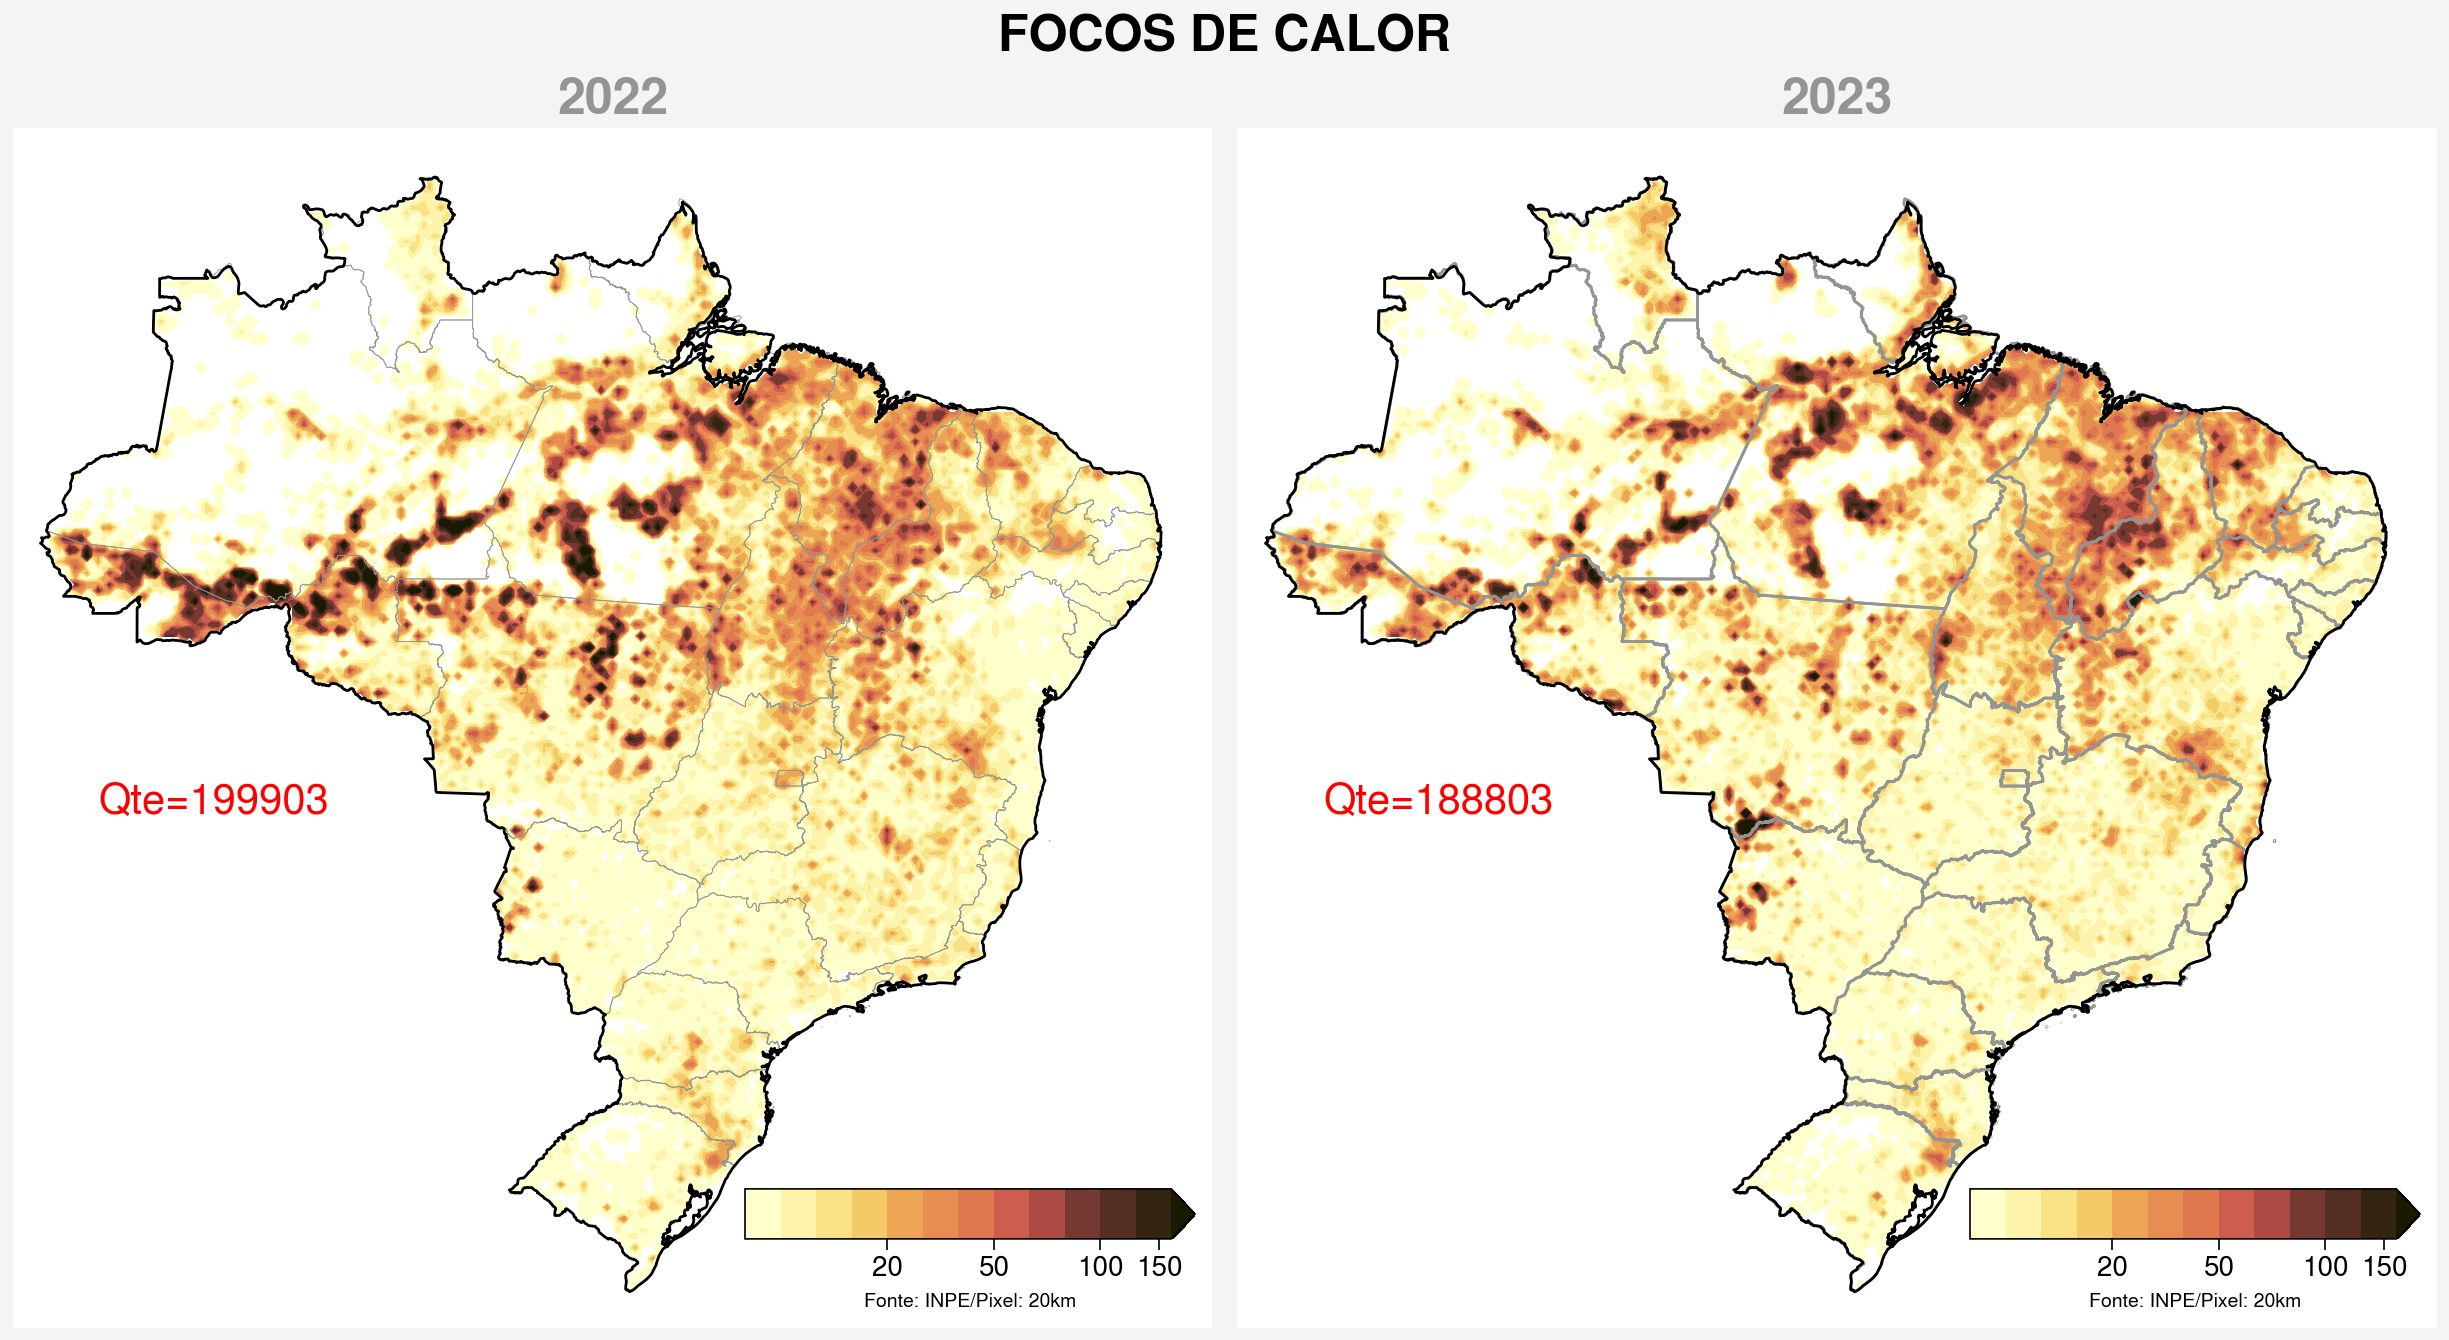

In [ ]:
%%time
#========================================================================================================================#
#                                                DEFINIÇÕES
#========================================================================================================================#
# Limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# leitura do shapefile do Brasil
shapefile_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')

#========================================================================================================================#
#                                           PLOTA FIGURA
#========================================================================================================================#
# cria a moldura da figura
fig, ax = pplt.subplots(axwidth=6, ncols=2, nrows=1, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          small='20px', large='25px',
          linewidth=0, grid=False,
          suptitle='FOCOS DE CALOR')

#--------------------------------------------------------------#
#                            FIG-1
#--------------------------------------------------------------#
# leitura do arquivo netcdf
ds = xr.open_dataset(f'{dir}output/focos_anual_Brasil_AQUA_{anos[0]}.nc')

# total de focos
total = ds['focos'].salem.roi(shape=shapefile_brasil)
total = int(np.sum(total))

# plota mapa
map1 = ax[0].contourf(ds['lon'],
                      ds['lat'],
                      ds['focos'].salem.roi(shape=shapefile_brasil),
                      alpha=1.0, zorder=1,
                      cmap='lajolla',
                      vmin=0.1, vmax=160,
                      levels=np.array([0.1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 100, 130, 160]),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'Fonte: INPE/Pixel: 20km',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 10,
                                   'labelsize': 7,
                                   'width': 2,
                                   'ticks': [20, 50, 100, 150],
                                   'ticklabels': ['20', '50', '100', '150']})

# plota subtítulo
ax[0].format(title=anos[0],
             titleloc='c',
             titleweight='bold',
             titlecolor='gray')

# plota contorno dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=0.3, alpha=1.0)

# plota contorno do Brasil
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1.0)

# plota quantidade de eventos
ax[0].text(-72., -17., f'Qte={total}', color='red', fontsize=15)

#--------------------------------------------------------------#
#                            FIG-2
#--------------------------------------------------------------#
# leitura do arquivo netcdf
ds = xr.open_dataset(f'{dir}output/focos_anual_Brasil_AQUA_{anos[1]}.nc')

# total de focos
total = ds['focos'].salem.roi(shape=shapefile_brasil)
total = int(np.sum(total))

# plota mapa
map2 = ax[1].contourf(ds['lon'],
                      ds['lat'],
                      ds['focos'].salem.roi(shape=shapefile_brasil),
                      alpha=1.0, zorder=1,
                      cmap='lajolla',
                      vmin=0.1, vmax=160,
                      levels=np.array([0.1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 100, 130, 160]),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'Fonte: INPE/Pixel: 20km',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 10,
                                   'labelsize': 7,
                                   'width': 2,
                                   'ticks': [20, 50, 100, 150],
                                   'ticklabels': ['20', '50', '100', '150']})

# plota subtítulo
ax[1].format(title=anos[1],
             titleloc='c',
             titleweight='bold',
             titlecolor='gray')

# plota contorno dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=1.0, alpha=1.0)

# plota contorno do Brasil
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1.0)

# legenda
ax[1].legend(loc='ll', ncols=1, frameon=False, prop={'size': 12.}, markerscale=1)

# plota quantidade de eventos
ax[1].text(-72., -17., f'Qte={total}', color='red', fontsize=15)
#--------------------------------------------------------------#

# salva figura
fig.savefig(f'{dir}output/Fig_1_mapa.jpg', transparent=True, dpi=300, bbox_inches="tight")



---


Escolha dois outros anos da série histórica (2003 à 2023) e realize uma comparação entre as diferenças na quantidade de focos por ano e distribuição espacial.


---



# **PARTE 3):** Séries Temporais

Analisaremos a série histórica de focos de calor de 2010 à 2024. Iremos gerar o gráfico de focos por dia, focos por ano e focos por ano/mês com o calendarplot.

## Leitura dos dados
- Iremos carregar os dados do INPE dos focos de calor. A leitura dos dados demora aproximadamente 3 min para processar esse bloco do código.

In [ ]:
%%time
#============================================================================================#
#                                    DADOS DE 2010-2023
#============================================================================================#
# ftp dos dados anual do satélite AQUA
url_2010_2023 = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_sat_ref/'

# cria uma tabela vazia
df_2010_a_2023 = pd.DataFrame()

# loop do arquivo de cada ano
for ano in np.arange(2010, 2024):

    print('.... Carregando os dados do ano=', ano)

    # leitura da tabela
    df0 = pd.read_csv(f'{url_2010_2023}focos_br_ref_{str(ano)}.zip', compression='zip')

    # junta a tabela que foi lida com a anterior
    df_2010_a_2023 = pd.concat([df_2010_a_2023, df0], ignore_index=True)

# remove colunas
df_2010_a_2023.drop(['id_bdq','foco_id','pais'], axis=1, inplace=True)

# renomeia coluna
df_2010_a_2023.rename(columns={'data_pas': 'data'}, inplace=True)

# reposiciona as colunas
df_2010_a_2023 = df_2010_a_2023[['data','lat','lon','municipio','estado','bioma']]

#============================================================================================#
#                                    DADOS DE 2024
#============================================================================================#
# ftp dos dados anual do satélite AQUA
url_2024 = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/mensal/Brasil/'

# cria uma tabela
df_2024 = pd.DataFrame()

# loop de cada arquivo da lista files
for data in pd.date_range('20240101','20241130',freq='1M'):

    # extrai ano e mês
    ano = data.strftime('%Y')
    mes = data.strftime('%m')

    print('.... Carregando os dados do ano/mês=', ano, mes)

    # leitura da tabela
    df0 = pd.read_csv(f'{url_2024}focos_mensal_br_{ano}{mes}.csv', usecols=['lat', 'lon', 'data_hora_gmt', 'satelite', 'municipio', 'estado', 'bioma'])

    # junta a tabela que foi lida com a anterior
    df_2024 = pd.concat([df_2024, df0], ignore_index=True)

# seleciona apenas para MG e para o satélite de referência AQUA_M-T
df_2024 = df_2024[ df_2024['satelite']=='AQUA_M-T' ]

# remove colunas
df_2024.drop(['satelite'], axis=1, inplace=True)

# renomeia coluna
df_2024.rename(columns={'data_hora_gmt': 'data'}, inplace=True)

# reposiciona as colunas
df_2024 = df_2024[['data','lat','lon','municipio','estado','bioma']]

#============================================================================================#
#                         JUNTA OS ARQUIVOS 2003-2023 E 2024
#============================================================================================#
# junta os dataframes
df_total = pd.concat([df_2010_a_2023, df_2024], ignore_index=True)

# transforma a coluna "datahora" para o formato "datetime"
df_total['data'] = pd.to_datetime(df_total['data'])

# seta a coluna "datahora" como o índice da tabela
df_total.set_index('data', inplace=True)

# ordena a tabela pelo índice
df_total.sort_index(inplace=True)

.... Carregando os dados do ano= 2010
.... Carregando os dados do ano= 2011
.... Carregando os dados do ano= 2012
.... Carregando os dados do ano= 2013
.... Carregando os dados do ano= 2014
.... Carregando os dados do ano= 2015
.... Carregando os dados do ano= 2016
.... Carregando os dados do ano= 2017
.... Carregando os dados do ano= 2018
.... Carregando os dados do ano= 2019
.... Carregando os dados do ano= 2020
.... Carregando os dados do ano= 2021
.... Carregando os dados do ano= 2022
.... Carregando os dados do ano= 2023
.... Carregando os dados do ano/mês= 2024 01
.... Carregando os dados do ano/mês= 2024 02
.... Carregando os dados do ano/mês= 2024 03
.... Carregando os dados do ano/mês= 2024 04
.... Carregando os dados do ano/mês= 2024 05
.... Carregando os dados do ano/mês= 2024 06
.... Carregando os dados do ano/mês= 2024 07
.... Carregando os dados do ano/mês= 2024 08
.... Carregando os dados do ano/mês= 2024 09
.... Carregando os dados do ano/mês= 2024 10
.... Carregando os

In [ ]:
# mostra o dataframe final
df_total

,lat,lon,municipio,estado,bioma
data,,,,,
2010-01-01 15:40:00,-10.34700,-36.77700,JAPOATÃ,SERGIPE,Mata Atlântica
2010-01-01 15:41:00,-8.44500,-36.66700,PESQUEIRA,PERNAMBUCO,Caatinga
2010-01-01 15:41:00,-8.44200,-36.68300,PESQUEIRA,PERNAMBUCO,Caatinga
2010-01-01 15:41:00,-9.86100,-37.53200,PORTO DA FOLHA,SERGIPE,Caatinga
2010-01-01 17:14:00,-28.94200,-55.99500,SÃO BORJA,RIO GRANDE DO SUL,Pampa
...,...,...,...,...,...
2024-11-26 17:41:00,-1.72656,-52.70103,PORTO DE MOZ,PARÁ,Amazônia
2024-11-26 17:41:00,-0.23872,-51.49946,MAZAGÃO,AMAPÁ,Amazônia
2024-11-26 17:41:00,-0.35792,-51.55688,MAZAGÃO,AMAPÁ,Amazônia


## Figura: `Total Diária`

Agrupa os dados por dia.
- No exemplo dos focos de calor diário, gostaríamos de calcular a quantidade de focos de calor que ocorreu para cada dia, desde 1 de janeiro de 2010 até 31 de dezembro de 2024.
- Para isto usaremos a função **groupby**, e como argumento utilizaremos a função [**Grouper**](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) do pandas. Usaremos o argumento **Freq='1D'** para dizer que queremos agrupar os dados por dia.

In [ ]:
# mostrando os dados que utilizaremos
df_total.head()

,lat,lon,municipio,estado,bioma
data,,,,,
2010-01-01 15:40:00,-10.347,-36.777,JAPOATÃ,SERGIPE,Mata Atlântica
2010-01-01 15:41:00,-8.445,-36.667,PESQUEIRA,PERNAMBUCO,Caatinga
2010-01-01 15:41:00,-8.442,-36.683,PESQUEIRA,PERNAMBUCO,Caatinga
2010-01-01 15:41:00,-9.861,-37.532,PORTO DA FOLHA,SERGIPE,Caatinga
2010-01-01 17:14:00,-28.942,-55.995,SÃO BORJA,RIO GRANDE DO SUL,Pampa


In [ ]:
# seleciona os focos ocorridos em MG
df_estado = df_total[ df_total['estado'] == 'MINAS GERAIS' ]

In [ ]:
# calculando a quantidade de focos de calor por dia
diaria = df_estado.groupby(pd.Grouper(freq='1D')).count()['lat']

In [ ]:
# mostrando a diária total
diaria

,lat
data,
2010-01-02,1
2010-01-03,0
2010-01-04,10
2010-01-05,6
2010-01-06,0
...,...
2024-11-22,0
2024-11-23,1
2024-11-24,3


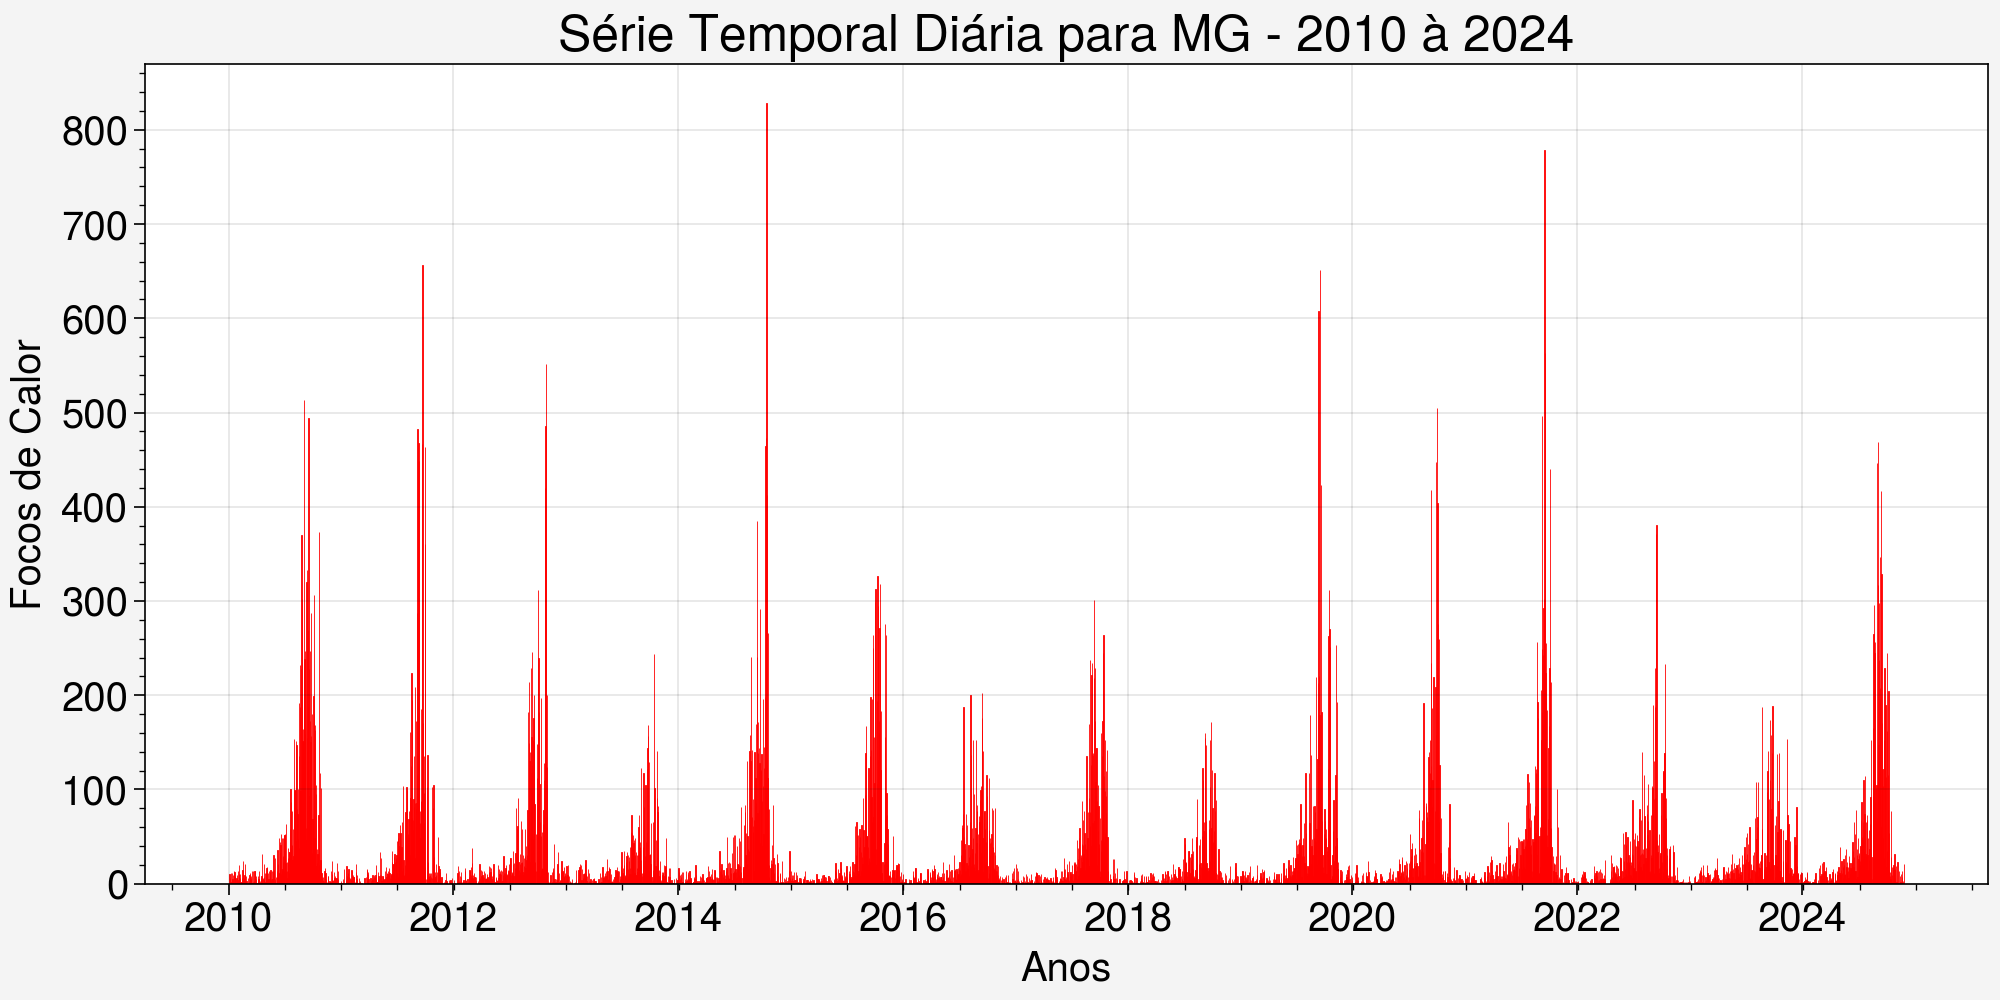

In [ ]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10,5), tight=True)

# plota gráfico de barras
ax.bar(diaria.index,
       diaria.values,
       color='red')

# formato dos eixos
ax.format(title='Série Temporal Diária para MG - 2010 à 2024',
          xlabel='Anos',
          ylabel='Focos de Calor',
          small='20px',
          large='25px',
          xrotation=0)

# salva figura
fig.save(f'{dir}output/Fig_2_serie_temporal_diaria.jpg', dpi=300)

# exibe figura na tela
pplt.show()

## Figura: `Por Ano`

In [ ]:
# dados que utilizaremos
df_estado

,lat,lon,municipio,estado,bioma
data,,,,,
2010-01-02 16:21:00,-20.26000,-43.79800,ITABIRITO,MINAS GERAIS,Mata Atlântica
2010-01-04 16:09:00,-17.49700,-45.25600,BURITIZEIRO,MINAS GERAIS,Cerrado
2010-01-04 16:09:00,-18.00900,-42.44100,SÃO SEBASTIÃO DO MARANHÃO,MINAS GERAIS,Mata Atlântica
2010-01-04 16:09:00,-16.89000,-41.46400,PONTO DOS VOLANTES,MINAS GERAIS,Mata Atlântica
2010-01-04 16:10:00,-15.81300,-41.84500,CURRAL DE DENTRO,MINAS GERAIS,Cerrado
...,...,...,...,...,...
2024-11-26 17:36:00,-19.34719,-44.80149,POMPÉU,MINAS GERAIS,Cerrado
2024-11-26 17:36:00,-17.22123,-45.46046,BURITIZEIRO,MINAS GERAIS,Cerrado
2024-11-26 17:36:00,-19.00113,-46.90272,PATROCÍNIO,MINAS GERAIS,Cerrado


In [ ]:
# calculando a anual total
anual = df_estado.groupby(pd.Grouper(freq='1Y')).count()['lat']

In [ ]:
# mostrando a anual total
anual

,lat
data,
2010-12-31,13766
2011-12-31,11766
2012-12-31,10108
2013-12-31,5387
2014-12-31,11337
2015-12-31,9490
2016-12-31,6482
2017-12-31,8383
2018-12-31,4627


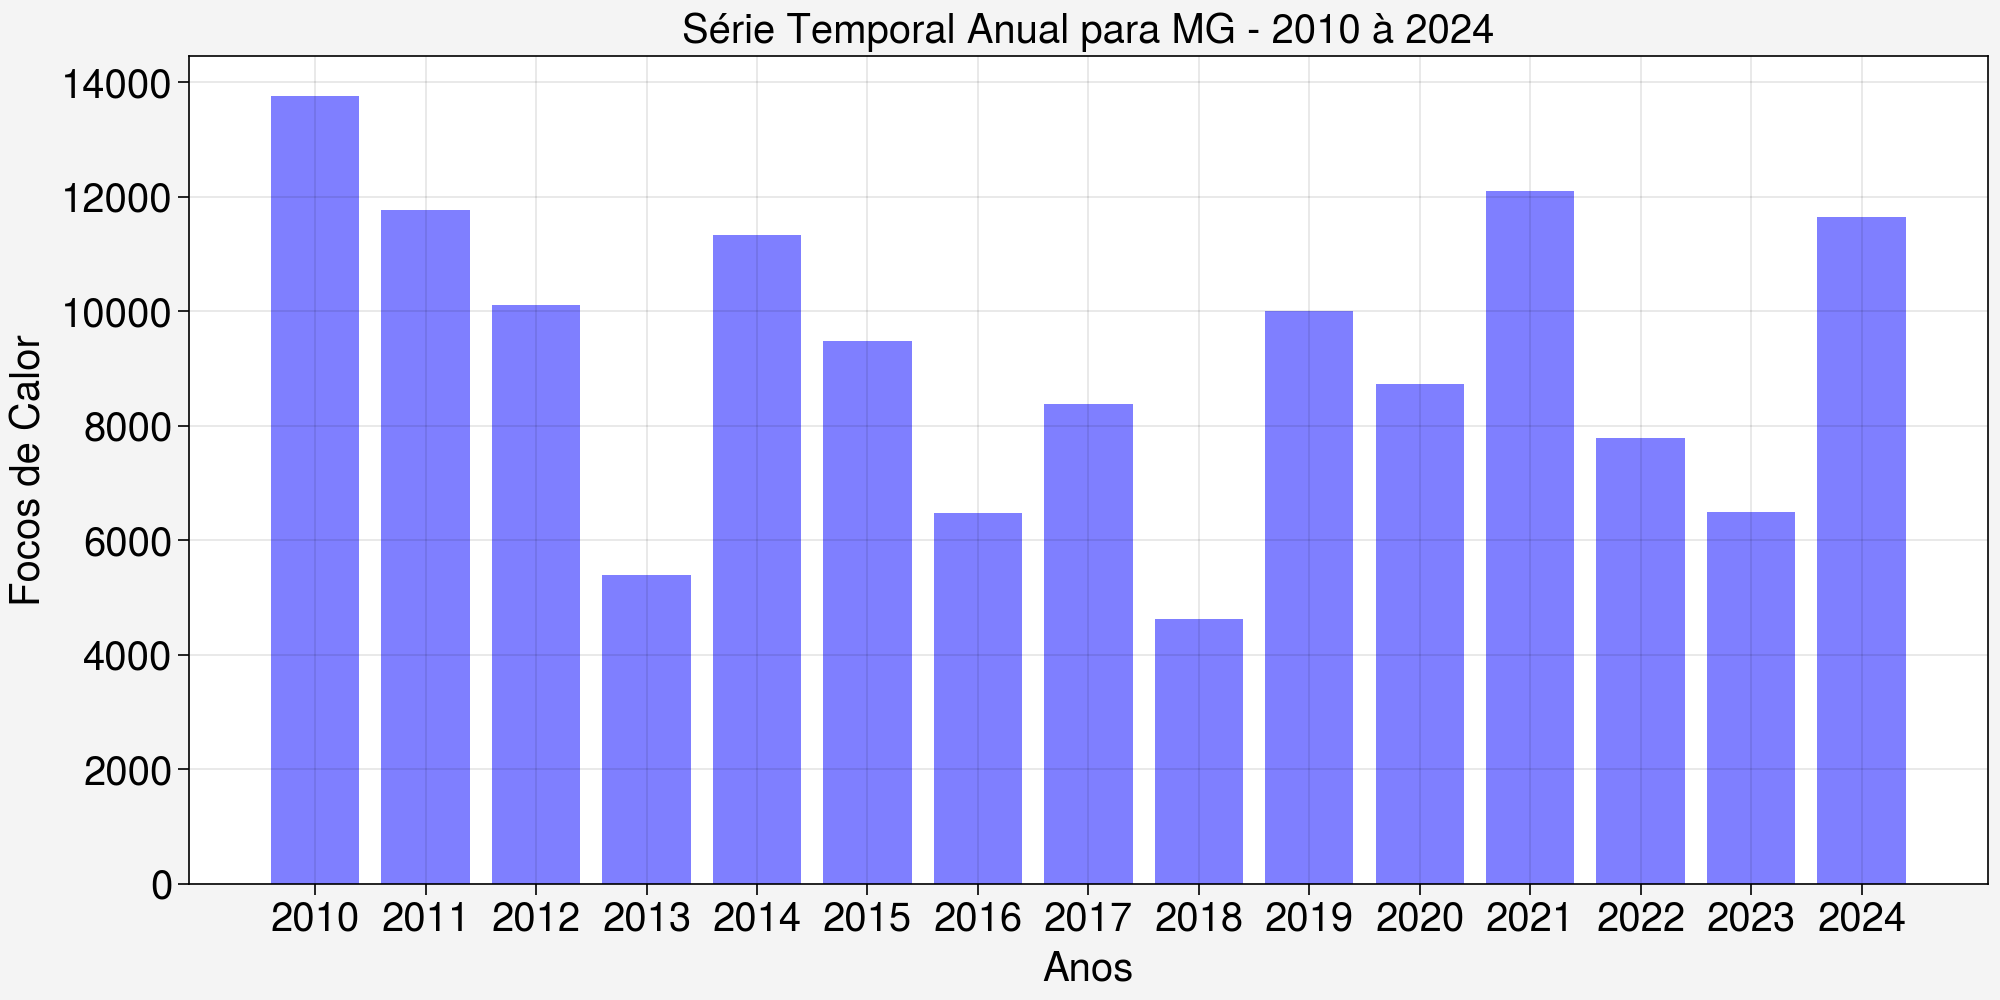

In [ ]:
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# plota gráfico de barras
ax.bar(anual.index.year,
       anual.values,
       color='blue',
       alpha=0.5)

# formatação do eixo
ax.format(title='Série Temporal Anual para MG - 2010 à 2024',
          xlabel='Anos',
          ylabel='Focos de Calor',
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=pplt.arange(2010,2024,1))

# salva figura
fig.save(f'{dir}output/Fig_3_serie_temporal_porano.jpg', dpi=300)

# exibe figura na tela
pplt.show()

## Figura: `CALENDARPLOTS`

In [ ]:
# dados que utilizaremos
diaria

,lat
data,
2010-01-02,1
2010-01-03,0
2010-01-04,10
2010-01-05,6
2010-01-06,0
...,...
2024-11-22,0
2024-11-23,1
2024-11-24,3


In [ ]:
# selecionando os dados de 2024
diaria.loc['2024']

,lat
data,
2024-01-01,0
2024-01-02,0
2024-01-03,0
2024-01-04,1
2024-01-05,0
...,...
2024-11-22,0
2024-11-23,1
2024-11-24,3


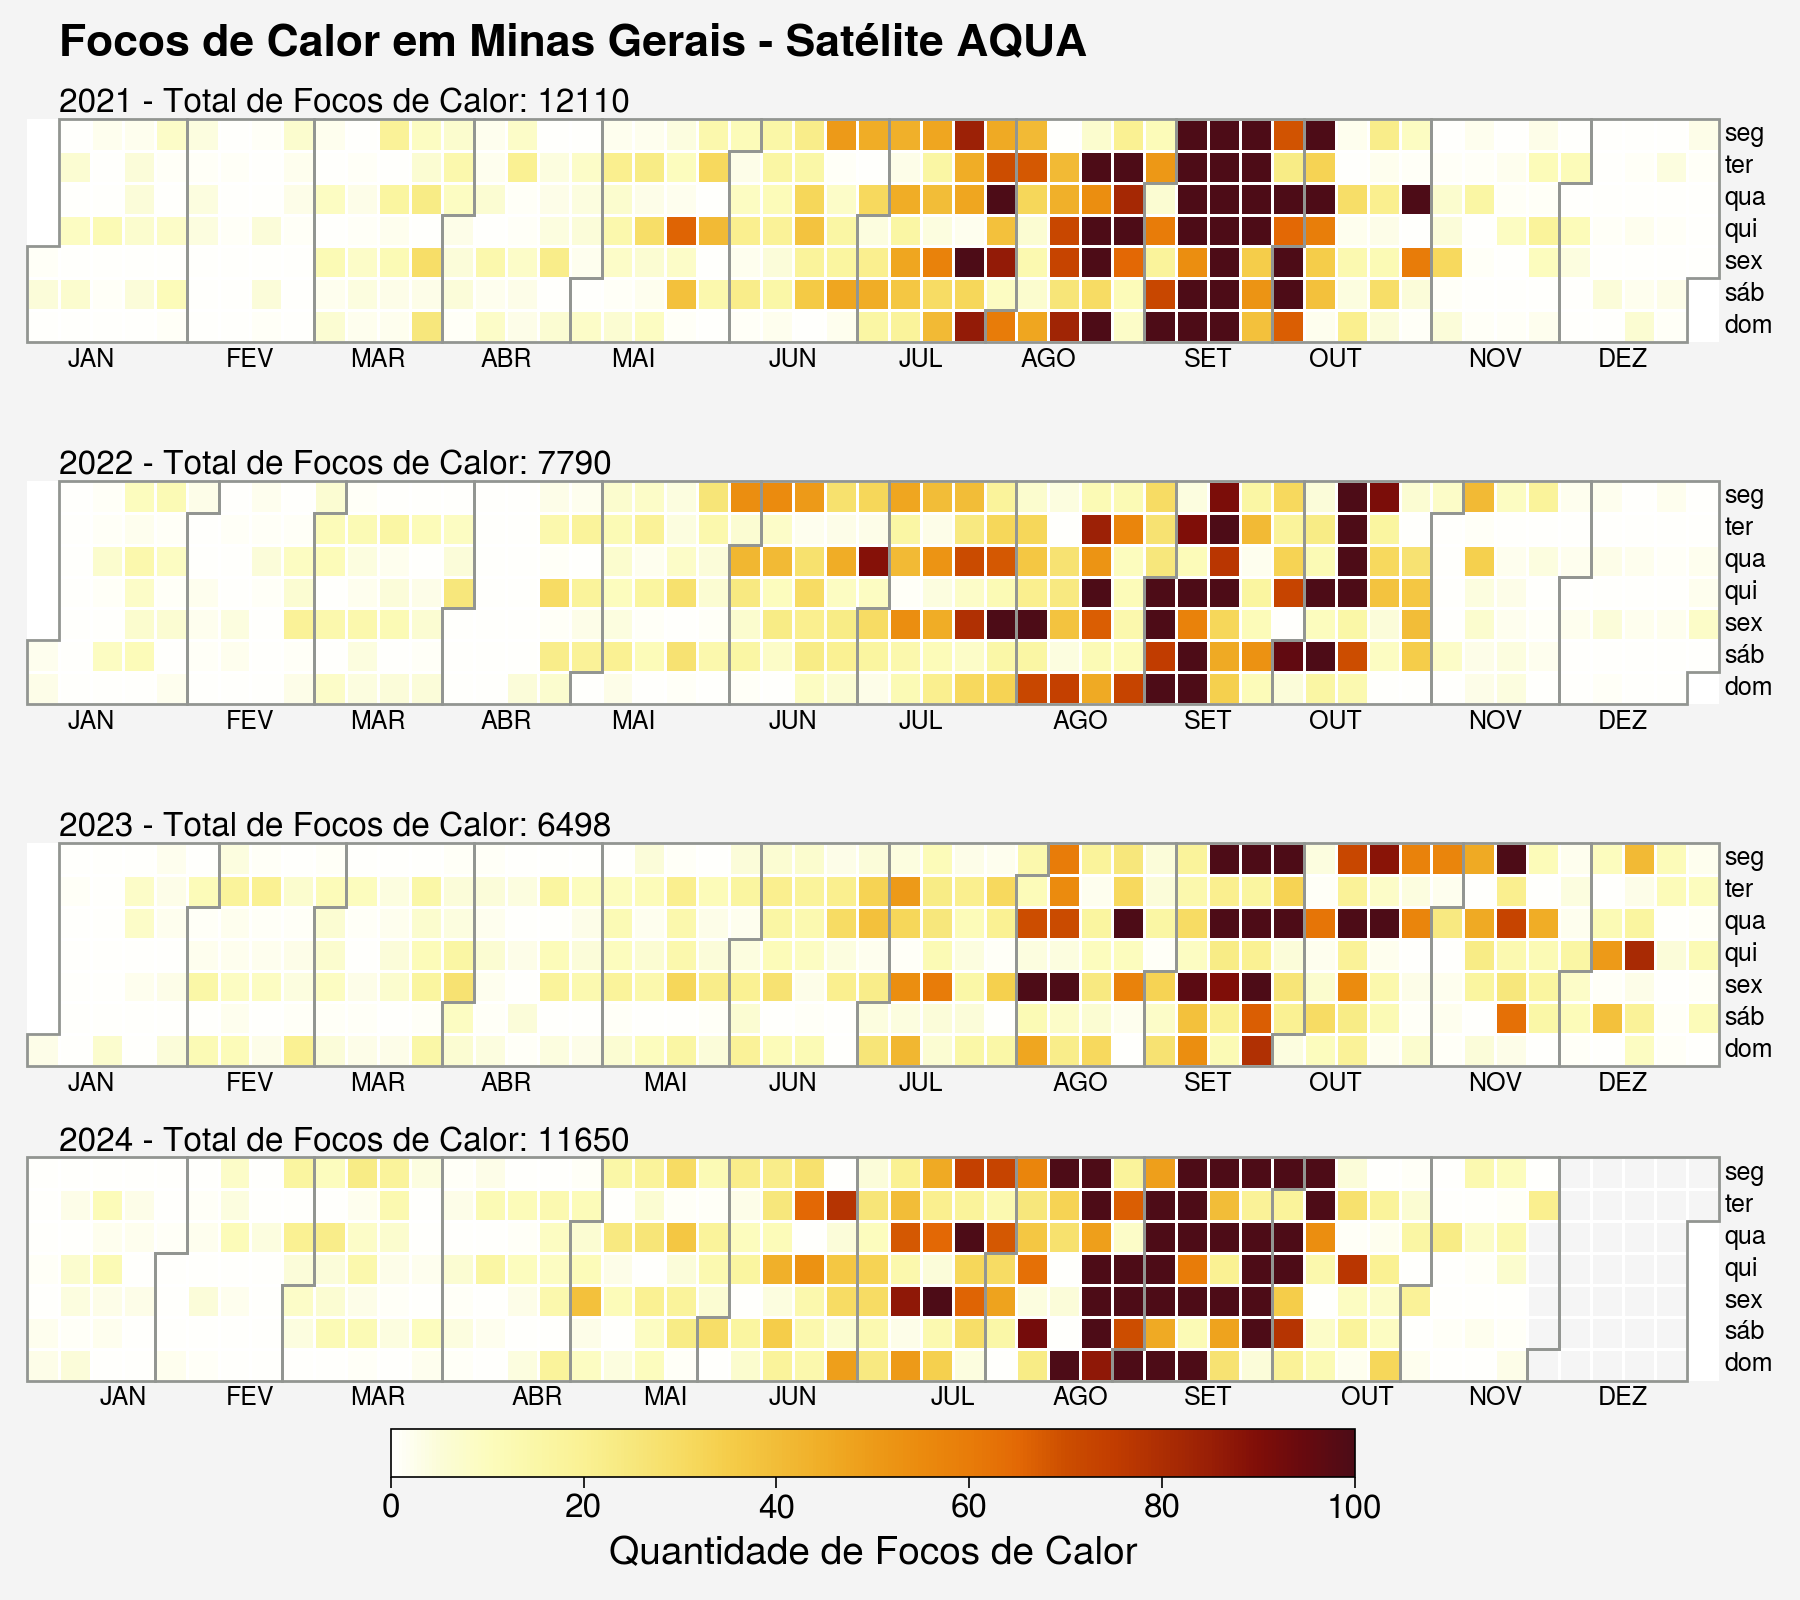

In [ ]:
#========================================================#
#               DEFINIÇÕES INICIAIS
#========================================================#
# moldura da figura
fig, ax = plt.subplots(figsize=(9,8), nrows=4)

# labels dos "dias da semana" e "meses do ano"
dias = ['seg', 'ter', 'qua', 'qui', 'sex','sáb', 'dom']
meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

#========================================================#
#                 FIGURA A) - 2021
#========================================================#
map1 = calplot.yearplot(diaria.loc['2021'],
                        cmap='Oranges1',
                        daylabels=dias,
                        monthlabels=meses,
                        vmin=0,
                        vmax=100,
                        ax=ax[0])

#========================================================#
#                  FIGURA B) - 2022
#========================================================#
calplot.yearplot(diaria.loc['2022'],
                 cmap='Oranges1',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[1])

#========================================================#
#                  FIGURA C) - 2023
#========================================================#
calplot.yearplot(diaria.loc['2023'],
                 cmap='Oranges1',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[2])

#========================================================#
#                  FIGURA D) - 2024
#========================================================#
calplot.yearplot(diaria.loc['2024'],
                 cmap='Oranges1',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[3])

#========================================================#
#                  DEMAIS DEFINIÇÕES
#========================================================#
# barra de cores
cb = fig.colorbar(map1.get_children()[1], orientation='horizontal', ticks=pplt.arange(0, 100, 20), shrink=0.75, ax=ax[3])
cb.ax.tick_params(labelsize=12)
cb.ax.tick_params(which='minor', width=0)
cb.set_label('Quantidade de Focos de Calor', fontsize=14)

# textos
ax[0].text(1., 9., 'Focos de Calor em Minas Gerais - Satélite AQUA', fontsize=16, color='black', fontweight='bold')
ax[0].text(1., 7.2, f"2021 - Total de Focos de Calor: {np.sum(diaria.loc['2021'].values)}", fontsize=12, color='black')
ax[1].text(1., 7.2, f"2022 - Total de Focos de Calor: {np.sum(diaria.loc['2022'].values)}", fontsize=12, color='black')
ax[2].text(1., 7.2, f"2023 - Total de Focos de Calor: {np.sum(diaria.loc['2023'].values)}", fontsize=12, color='black')
ax[3].text(1., 7.2, f"2024 - Total de Focos de Calor: {np.sum(diaria.loc['2024'].values)}", fontsize=12, color='black')

# salva figura
plt.tight_layout()
plt.savefig(f'{dir}output/Fig_4_calendar_plot.jpg', bbox_inches='tight', dpi=300)
plt.show()